In [15]:
# Import das bibliotecas do Python
import sys
import komm
import numpy as np
import pandas as pd
import itertools as it
from itertools import product
from fractions import Fraction 
import matplotlib.pyplot as plt

# Cria um objeto do código de Hamming (7,4)
hamm74 = komm.HammingCode(3)
(n, k) = (hamm74.length, hamm74.dimension)

# Imprime o código de Hamming (7,4)
print("Código de Hamming (7,4):")
print(n, k)

# Cria e Imprime a matriz geradora G (7,4)
G = hamm74.generator_matrix
print("Matriz geradora G (7,4):")
print(G)

Código de Hamming (7,4):
7 4
Matriz geradora G (7,4):
[[1 0 0 0 1 1 0]
 [0 1 0 0 1 0 1]
 [0 0 1 0 0 1 1]
 [0 0 0 1 1 1 1]]


In [16]:
# Calcula o bit de paridade para cada linha e adiciona à matriz

# Calcula a paridade (soma módulo 2 de cada linha)
parity_column = np.sum(G, axis=1)


# Adiciona a coluna de paridade
G_extended = np.hstack((G, parity_column.reshape(-1, 1)))  

# Imprime a matriz geradora estendida (8,4)
print("\nMatriz geradora estendida G (8,4):")
print(G_extended)



Matriz geradora estendida G (8,4):
[[1 0 0 0 1 1 0 3]
 [0 1 0 0 1 0 1 3]
 [0 0 1 0 0 1 1 3]
 [0 0 0 1 1 1 1 4]]


In [17]:
# Define a função para mapear a mensagem para uma palavra código de 8 bits
def encode_message(m, G_extended):
    # Converte a mensagem em um array numpy, caso ainda não seja
    m = np.array(m)
    # Multiplica a mensagem pela matriz geradora estendida no campo GF(2)
    codeword = np.dot(m, G_extended) % 2  # Calcula a palavra código em aritmética módulo 2
    return codeword

# Exemplo de uso
message = [1, 0, 1, 1]  # Mensagem de 4 bits
codeword = encode_message(message, G_extended)

print("Mensagem de entrada (4 bits):", message)
print("Palavra código gerada (8 bits):", codeword)

# Altera o comprimento de n para 8
n = n + 1

# calcula o número de bits da mensagem 
m_length = n - k

Mensagem de entrada (4 bits): [1, 0, 1, 1]
Palavra código gerada (8 bits): [1 0 1 1 0 1 0 0]


In [18]:
# Gera todas as mensagens de 4 bits possíveis
all_messages = list(product([0, 1], repeat=4))  # Gera combinações de 4 bits

# Exibe cada mensagem e sua palavra código correspondente
print("Mensagem (4 bits) -> Palavra código (8 bits)")
for m in all_messages:
    codeword = encode_message(m, G_extended)
    print(f"{m} -> {codeword}")

Mensagem (4 bits) -> Palavra código (8 bits)
(0, 0, 0, 0) -> [0 0 0 0 0 0 0 0]
(0, 0, 0, 1) -> [0 0 0 1 1 1 1 0]
(0, 0, 1, 0) -> [0 0 1 0 0 1 1 1]
(0, 0, 1, 1) -> [0 0 1 1 1 0 0 1]
(0, 1, 0, 0) -> [0 1 0 0 1 0 1 1]
(0, 1, 0, 1) -> [0 1 0 1 0 1 0 1]
(0, 1, 1, 0) -> [0 1 1 0 1 1 0 0]
(0, 1, 1, 1) -> [0 1 1 1 0 0 1 0]
(1, 0, 0, 0) -> [1 0 0 0 1 1 0 1]
(1, 0, 0, 1) -> [1 0 0 1 0 0 1 1]
(1, 0, 1, 0) -> [1 0 1 0 1 0 1 0]
(1, 0, 1, 1) -> [1 0 1 1 0 1 0 0]
(1, 1, 0, 0) -> [1 1 0 0 0 1 1 0]
(1, 1, 0, 1) -> [1 1 0 1 1 0 0 0]
(1, 1, 1, 0) -> [1 1 1 0 0 0 0 1]
(1, 1, 1, 1) -> [1 1 1 1 1 1 1 1]


In [19]:
# Calcula o peso de Hamming de uma palavra código

# Vetores para armazenar as palavras-código e seus pesos
codewords = []
weights = []

# Calcula o peso de Hamming de cada palavra código
print("Mensagem (4 bits) -> Palavra código (8 bits) -> Peso")
for m in all_messages:
    codeword = encode_message(m, G_extended)
    weight = np.sum(codeword)  # Calcula o peso (número de bits 1)
    codewords.append(codeword)
    weights.append(weight)
    print(f"{m} -> {codeword} -> {weight}")


Mensagem (4 bits) -> Palavra código (8 bits) -> Peso
(0, 0, 0, 0) -> [0 0 0 0 0 0 0 0] -> 0
(0, 0, 0, 1) -> [0 0 0 1 1 1 1 0] -> 4
(0, 0, 1, 0) -> [0 0 1 0 0 1 1 1] -> 4
(0, 0, 1, 1) -> [0 0 1 1 1 0 0 1] -> 4
(0, 1, 0, 0) -> [0 1 0 0 1 0 1 1] -> 4
(0, 1, 0, 1) -> [0 1 0 1 0 1 0 1] -> 4
(0, 1, 1, 0) -> [0 1 1 0 1 1 0 0] -> 4
(0, 1, 1, 1) -> [0 1 1 1 0 0 1 0] -> 4
(1, 0, 0, 0) -> [1 0 0 0 1 1 0 1] -> 4
(1, 0, 0, 1) -> [1 0 0 1 0 0 1 1] -> 4
(1, 0, 1, 0) -> [1 0 1 0 1 0 1 0] -> 4
(1, 0, 1, 1) -> [1 0 1 1 0 1 0 0] -> 4
(1, 1, 0, 0) -> [1 1 0 0 0 1 1 0] -> 4
(1, 1, 0, 1) -> [1 1 0 1 1 0 0 0] -> 4
(1, 1, 1, 0) -> [1 1 1 0 0 0 0 1] -> 4
(1, 1, 1, 1) -> [1 1 1 1 1 1 1 1] -> 8


In [20]:
# Calcula a distância mínima
def hamming_distance(codeword1, codeword2):
    return np.sum(codeword1 != codeword2)

min_distance = float('inf')

for i in range(len(codewords)):
    for j in range(i + 1, len(codewords)):
        dist = hamming_distance(codewords[i], codewords[j])
        if dist < min_distance:
            min_distance = dist

print("\nDistância mínima entre as palavras-código:", min_distance)

# Distribuição de pesos
weight_distribution = {i: weights.count(i) for i in range(9)}  # Peso varia de 0 a 8

print("Distribuição de pesos:")
for weight, count in weight_distribution.items():
    if count > 0:
        print(f"Peso {weight}: {count} palavra(s) código")


Distância mínima entre as palavras-código: 4
Distribuição de pesos:
Peso 0: 1 palavra(s) código
Peso 4: 14 palavra(s) código
Peso 8: 1 palavra(s) código


In [21]:
# Matriz (8,4) geradora do código de Hamming
G_input = np.array([
              [1, 0, 0, 0, 1, 1, 0, 1],  
              [0, 1, 0, 0, 1, 0, 1, 1],  
              [0, 0, 1, 0, 0, 1, 1, 1],  
              [0, 0, 0, 1, 1, 1, 1, 0]]) 

In [22]:
# Inicializando matriz de padrões de erro com 16 linhas
errorMatrix = np.zeros((16, 2**k, n), dtype=int)

# Gerando palavras código aleatórias para cada coluna da primeira linha (exceto na primeira posição)
for col in range(1, 2**k):
    errorMatrix[0, col] = np.random.randint(2, size=n) 

# Preenchendo a primeira coluna com a matriz identidade para padrões de erro de 1 bit
for i in range(1, min(9, 16)):
    errorMatrix[i, 0] = np.eye(n, dtype=int)[i-1]

# Gerando padrões de erro para 1 bit
for row in range(1, 9):  # Para as linhas 1 a 8
    for col in range(1, 2**k):  # Para todas as colunas
        errorMatrix[row, col] = (errorMatrix[0, col] + errorMatrix[row, 0]) % 2

# Gerando padrões de erro para 2 bits
two_bit_errors = list(it.combinations(range(n), 2))

# Contador para controlar o número de padrões de dois bits
two_bit_count = 0  

# Laço para terminar com as linhas da tabela (16 linhas no total)
for pos in two_bit_errors:
    if 9 + two_bit_count >= 16: 
        break

    error_pattern = np.zeros(n, dtype=int)
    error_pattern[list(pos)] = 1
    errorMatrix[9 + two_bit_count, 0] = error_pattern

    # Aplicando a combinação de dois bits de erro na matriz
    for col in range(1, 2**k):
        errorMatrix[9 + two_bit_count, col] = (errorMatrix[0, col] + errorMatrix[9 + two_bit_count, 0]) % 2
    
    two_bit_count += 1  # Incrementa o contador de padrões de dois bits

# Preencher as linhas restantes com padrões aleatórios, se necessário
for i in range(9 + two_bit_count, 16):
    for col in range(2**k):
        errorMatrix[i, col] = np.random.randint(2, size=n)  # Gera 0s e 1s aleatórios

# Inicializando a matriz de pesos
w_matrix = np.zeros((16, 2**k), dtype=int)

# Calculando os pesos para cada padrão de erro
for row in range(16):
    for col in range(2**k):
        w_matrix[row, col] = sum(errorMatrix[row, col])

# Impressão da matriz de padrões de erro
print("Matriz de Padrões de Erro (ap):")
for i in range(errorMatrix.shape[0]):
    for j in range(errorMatrix.shape[1]):
        print(f"{''.join(map(str, errorMatrix[i, j]))}", end=" ")
    print()

Matriz de Padrões de Erro (ap):
00000000 10101001 01110000 11000111 00010101 01101101 11010000 10110010 01001011 01011101 11111000 10001100 11010101 01010001 01000100 01000000 
10000000 00101001 11110000 01000111 10010101 11101101 01010000 00110010 11001011 11011101 01111000 00001100 01010101 11010001 11000100 11000000 
01000000 11101001 00110000 10000111 01010101 00101101 10010000 11110010 00001011 00011101 10111000 11001100 10010101 00010001 00000100 00000000 
00100000 10001001 01010000 11100111 00110101 01001101 11110000 10010010 01101011 01111101 11011000 10101100 11110101 01110001 01100100 01100000 
00010000 10111001 01100000 11010111 00000101 01111101 11000000 10100010 01011011 01001101 11101000 10011100 11000101 01000001 01010100 01010000 
00001000 10100001 01111000 11001111 00011101 01100101 11011000 10111010 01000011 01010101 11110000 10000100 11011101 01011001 01001100 01001000 
00000100 10101101 01110100 11000011 00010001 01101001 11010100 10110110 01001111 01011001 11111100

In [23]:
# Calcular síndromes
H = np.array([[1, 1, 0, 1, 1, 0, 0, 0],
              [1, 0, 1, 1, 0, 1, 0, 0],
              [0, 1, 1, 1, 0, 0, 1, 0],
              [1, 1, 1, 0, 0, 0, 0, 1]])

syndrome = (H @ errorMatrix[:, 0, :].T) % 2

# Criação da para as síndromes e padrões de erro
e_s = pd.DataFrame(columns=["syndrome", "error"])
e_s["syndrome"] = ["".join(map(str, s)) for s in syndrome.T]
e_s["error"] = ["".join(map(str, err)) for err in errorMatrix[:, 0, :]]

# Filtrar apenas as entradas únicas
e_s = e_s.drop_duplicates()

e_s["syndrome"] = [x for x in syndrome.T]
e_s["error"] = [x for x in errorMatrix[:, 0, :]]

# Exibir o DataFrame resultante
print(e_s)

        syndrome                     error
0   [0, 0, 0, 0]  [0, 0, 0, 0, 0, 0, 0, 0]
1   [1, 1, 0, 1]  [1, 0, 0, 0, 0, 0, 0, 0]
2   [1, 0, 1, 1]  [0, 1, 0, 0, 0, 0, 0, 0]
3   [0, 1, 1, 1]  [0, 0, 1, 0, 0, 0, 0, 0]
4   [1, 1, 1, 0]  [0, 0, 0, 1, 0, 0, 0, 0]
5   [1, 0, 0, 0]  [0, 0, 0, 0, 1, 0, 0, 0]
6   [0, 1, 0, 0]  [0, 0, 0, 0, 0, 1, 0, 0]
7   [0, 0, 1, 0]  [0, 0, 0, 0, 0, 0, 1, 0]
8   [0, 0, 0, 1]  [0, 0, 0, 0, 0, 0, 0, 1]
9   [0, 1, 1, 0]  [1, 1, 0, 0, 0, 0, 0, 0]
10  [1, 0, 1, 0]  [1, 0, 1, 0, 0, 0, 0, 0]
11  [0, 0, 1, 1]  [1, 0, 0, 1, 0, 0, 0, 0]
12  [0, 1, 0, 1]  [1, 0, 0, 0, 1, 0, 0, 0]
13  [1, 0, 0, 1]  [1, 0, 0, 0, 0, 1, 0, 0]
14  [1, 1, 1, 1]  [1, 0, 0, 0, 0, 0, 1, 0]
15  [1, 1, 0, 0]  [1, 0, 0, 0, 0, 0, 0, 1]


Questão 2 


In [25]:
# Criação de um dicionário para mapear as síndromes para os padrões de erro
syndrome_error = {tuple(s): e for s, e in zip(e_s["syndrome"], e_s["error"])}


# Criando um vetor de 100 mensagens de 4 bits aleatórias
u = np.random.randint(0, 2, (100000, 4))

# Codificação das mensagens de 4 bits em palavras código de 8 bits usando a matriz geradora estendida
v = (u @ G_input) % 2

# Inicializando o modulador QPSK e o canal AWGN
qpsk_mod = komm.PSKModulation(4)


# Inicializando o modulador QPSK e o canal AWGN para o código de Hamming
SNR = range(-1, 8)  # dB

# Inicializando os vetores de BER para o código de Hamming e sem código
ber = np.zeros(len(SNR))
ber_hamm = np.zeros(len(SNR))


# Loop para calcular a BER para cada valor de SNR 
for i, snr in enumerate(SNR):

    # calculando o valor de dBm de volta para lienar 
    snr_lin = 10 ** (snr / 10)

    # Inicializando o canal AWGN e aplicando a SNR em linear
    awgn = komm.AWGNChannel(signal_power="measured", snr=snr_lin)

    # Modulação, transmissão, recepção e demodulação para o código de Hamming
    v_mod = qpsk_mod.modulate(v.flatten())
    vb = awgn(v_mod)
    v_demod = qpsk_mod.demodulate(vb).reshape(-1, 8)

    # Decodificação do código de Hamming
    s = ((H @ v_demod.T) % 2).T

    # Calculando a palavra código corrigida para cada síndrome usando a tabela de síndromes e padrões de erro
    errors = np.array([syndrome_error[tuple(x)] for x in s])
    v_hat = (v_demod + errors) % 2

    # Calculando a BER para o código de Hamming 
    ber_hamm[i] = np.sum(v_hat.reshape(-1) != v.reshape(-1)) / 100000

    # Modulação, transmissão, recepção e demodulação sem código de Hamming
    u_mod = qpsk_mod.modulate(u.flatten())
    ub = awgn(u_mod)
    u_hat = qpsk_mod.demodulate(ub).reshape(-1, 4)

    # Calculando a BER sem código de Hamming
    ber[i] = np.sum(u_hat.reshape(-1) != u.reshape(-1)) / 100000

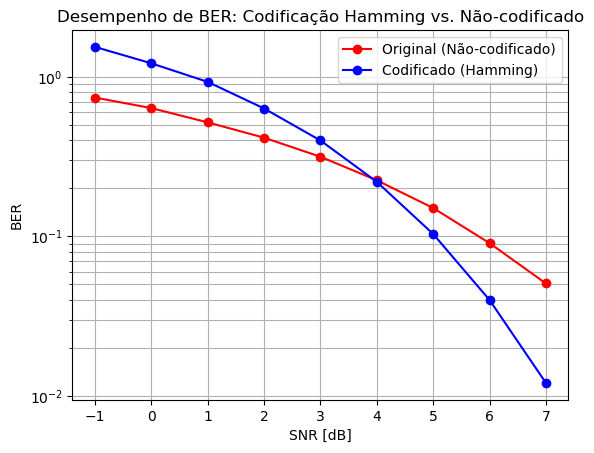

In [33]:
# Plotando BER original e codificado
plt.figure()

plt.semilogy(SNR, ber, label="Original (Não-codificado)", marker="o", color="red")
plt.semilogy(SNR, ber_hamm, label="Codificado (Hamming)",marker="o", color="blue")

plt.xlabel("SNR [dB]")
plt.Figure(figsize=(10, 6))
plt.ylabel("BER")
plt.title("Desempenho de BER: Codificação Hamming vs. Não-codificado")

plt.legend()
plt.grid(True, which="both")  # Grid em ambas escalas
plt.show()
